In [1]:
import librosa
import numpy as np
import configparser
import matplotlib.pyplot as plt
from librosa import display

In [2]:
config = configparser.ConfigParser()
config.read('../config/config-spyder.ini')

['../config/config-spyder.ini']

Cargamos nuestro modelo para realizar las pruebas:

In [3]:
from keras.models import model_from_json, Model

with open('../results/best-model/model.json') as f:
    config_model = f.read()
    
model = model_from_json(config_model)
model.load_weights('../results/best-model/weights.hdf5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Creamos una función que nos permite extraer las características de nuestra canción y crearnos el spectograma

In [4]:
def obtenerFeatures(path, offset):
    y, sr = librosa.load(path, offset=offset, duration=29)
    S = librosa.power_to_db(
        librosa.feature.melspectrogram(
            y,
            sr = sr,
            n_mels = int(config['AUDIO_FEATURES']['N_MELS']),
            n_fft = int(config['AUDIO_FEATURES']['N_FFT']),
            hop_length = int(config['AUDIO_FEATURES']['HOP_LENGTH'])),
            ref = np.max)
    return S

[![IMAGE ALT TEXT](http://img.youtube.com/vi/CS9OO0S5w2k/0.jpg)](https://www.youtube.com/watch?v=CS9OO0S5w2k "Village People - YMCA OFFICIAL Music Video 1978")
<h3> Village People - YMCA OFFICIAL Music Video 1978 </h3>

<bold> Género Esperado: </bold> Disco = 3

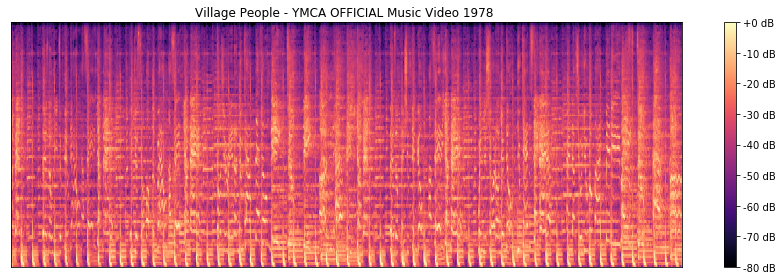

In [5]:
S = obtenerFeatures("/Users/josetorronteras/Downloads/Village People - YMCA OFFICIAL Music Video 1978.mp3", 12)

plt.figure(figsize=(12,4))
librosa.display.specshow(S)

plt.colorbar(format='%+2.0f dB')
plt.title('Village People - YMCA OFFICIAL Music Video 1978 ')
plt.tight_layout()

song = S.reshape(1, S.shape[0], S.shape[1], 1).astype('float32')
Y_pred = model.predict(song)
y_pred = np.argmax(Y_pred, axis=1)

In [6]:
print("Género esperado: 3 - Género predecido: ", y_pred)

Género esperado: 3 - Género predecido:  [3]


[![IMAGE ALT TEXT](http://img.youtube.com/vi/TZCfydWF48c/0.jpg)](https://www.youtube.com/watch?v=TZCfydWF48c "Antonio Vivaldi - Winter (Full) - The Four Seasons")
<h3> Antonio Vivaldi - Winter (Full) - The Four Seasons </h3>

<bold> Género Esperado: </bold> Clásico = 1

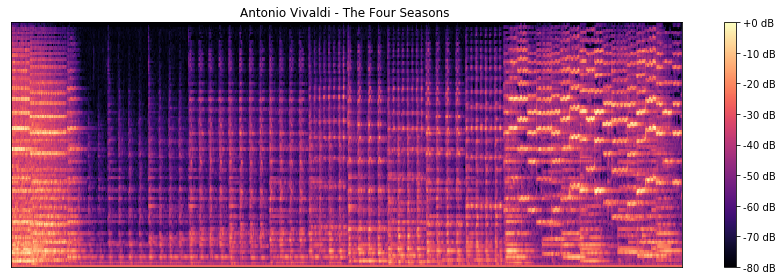

In [7]:
S = obtenerFeatures("/Users/josetorronteras/Downloads/Antonio Vivaldi - Winter (Full) - The Four Seasons.mp3", 124)

plt.figure(figsize=(12,4))
librosa.display.specshow(S)

plt.colorbar(format='%+2.0f dB')
plt.title('Antonio Vivaldi - The Four Seasons ')
plt.tight_layout()

song = S.reshape(1, S.shape[0], S.shape[1], 1).astype('float32')
Y_pred = model.predict(song)
y_pred = np.argmax(Y_pred, axis=1)

In [8]:
print("Género esperado: 1 - Género predecido: ", y_pred)

Género esperado: 1 - Género predecido:  [1]


[![IMAGE ALT TEXT](http://img.youtube.com/vi/5qm8PH4xAss/0.jpg)](https://www.youtube.com/watch?v=5qm8PH4xAss "50 Cent - In Da Club")
<h3> 50 Cent - In Da Club </h3>

<bold> Género Esperado: </bold> Hiphop = 4

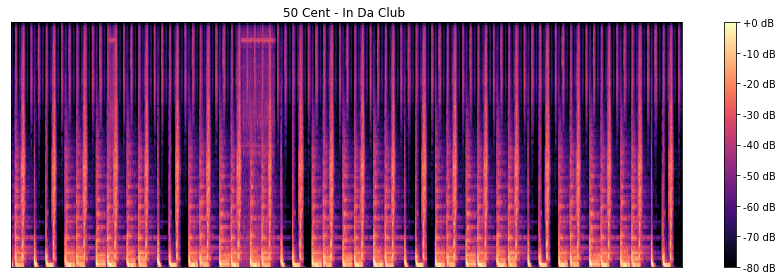

In [9]:
S = obtenerFeatures("/Users/josetorronteras/Downloads/50 Cent - In Da Club (Int'l Version).mp3", 1)

plt.figure(figsize=(12,4))
librosa.display.specshow(S)

plt.colorbar(format='%+2.0f dB')
plt.title('50 Cent - In Da Club ')
plt.tight_layout()

song = S.reshape(1, S.shape[0], S.shape[1], 1).astype('float32')
Y_pred = model.predict(song)
y_pred = np.argmax(Y_pred, axis=1)

In [10]:
print("Género esperado: 4 - Género predecido: ", y_pred)

Género esperado: 4 - Género predecido:  [4]


[![IMAGE ALT TEXT](http://img.youtube.com/vi/l482T0yNkeo/0.jpg)](https://www.youtube.com/watch?v=l482T0yNkeo "ACDC - Highway to Hell")
<h3> ACDC - Highway to Hell </h3>

<bold> Género Esperado: </bold> Rock = 9

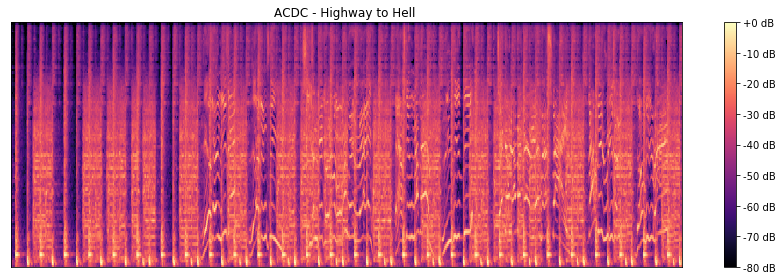

In [11]:
S = obtenerFeatures("/Users/josetorronteras/Downloads/ACDC - Highway to Hell (Official Video).mp3", 10)

plt.figure(figsize=(12,4))
librosa.display.specshow(S)

plt.colorbar(format='%+2.0f dB')
plt.title('ACDC - Highway to Hell ')
plt.tight_layout()

song = S.reshape(1, S.shape[0], S.shape[1], 1).astype('float32')
Y_pred = model.predict(song)
y_pred = np.argmax(Y_pred, axis=1)

In [12]:
print("Género esperado: 9 - Género predecido: ", y_pred)

Género esperado: 9 - Género predecido:  [3]
